In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from functools import reduce

# Census API Key
from config import api_key
c = Census(api_key, year=2017)


In [2]:
# Run Census Search to retrieve data on all states (2017 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_pd = c.acs5.get(("NAME","B19013_001E","B01002_001E","B01002_002E", "B01002_003E", "B02001_002E",
                        "B02001_003E", "B02001_004E", "B02001_005E", "B02001_006E", "B02001_007E", "B15003_002E",
                                "B15003_017E", "B15003_018E", "B15003_020E", "B15003_021E", "B15003_022E","B15003_023E",
                                "B15003_024E","B15003_025E"), {'for': 'county:*', 'in': 'state: *'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_pd)


# Column Reordering
census_pd = census_pd.rename(columns={"B19013_001E": "Household Income",
                                      "B01002_001E": "Median Age",
                                      "B01002_002E": "Median Male Age",
                                      "B01002_003E": "Median Female Age",
                                      "B02001_002E": "White",
                                      "B02001_003E": "Black or African American",
                                      "B02001_004E": "American Indian and Alaska Native",
                                      "B02001_005E": "Asian",                                   
                                      "B02001_006E": "Native Hawaiian and Other Pacific Islander",
                                      "B02001_007E": "Other",
                                      "B15003_002E": "No Education",
                                      "B15003_017E": "High School", 
                                      "B15003_018E": "GED",
                                      "B15003_020E": "Some College",
                                      "B15003_021E": "Associates Degree",
                                      "B15003_022E": "Bachelors Degree",
                                      "B15003_023E": "Masters Degree",
                                      "B15003_024E": "Professional Degree",
                                      "B15003_025E": "Doctoral Degree",
                                      "state": "State FIPS",
                                      "county": "County FIPS",
                                      "NAME": "Name"})

# Final DataFrame
census_pd = census_pd[["Name", "State FIPS", "County FIPS", "Household Income", "Median Age", "Median Male Age", 
                    "Median Female Age","White", "Black or African American", "American Indian and Alaska Native",
                       "Asian", "Native Hawaiian and Other Pacific Islander", "Other", "No Education", "High School", "GED", "Some College", "Associates Degree",
                                         "Bachelors Degree", "Professional Degree", "Doctoral Degree"]]

print(len(census_pd))
census_pd.head()

3220


,Name,State FIPS,County FIPS,Household Income,Median Age,Median Male Age,Median Female Age,White,Black or African American,American Indian and Alaska Native,...,Native Hawaiian and Other Pacific Islander,Other,No Education,High School,GED,Some College,Associates Degree,Bachelors Degree,Professional Degree,Doctoral Degree
0,"Corozal Municipio, Puerto Rico",72,047,14752.0,38.1,36.9,39.3,28500.0,2097.0,0.0,...,0.0,2916.0,698.0,6371.0,262.0,2972.0,1837.0,3142.0,0.0,92.0
1,"Maunabo Municipio, Puerto Rico",72,095,17636.0,43.5,42.9,44.0,3795.0,7042.0,10.0,...,0.0,317.0,320.0,1874.0,161.0,935.0,690.0,1156.0,0.0,13.0
2,"Peñuelas Municipio, Puerto Rico",72,111,16868.0,36.4,35.7,37.1,16967.0,755.0,29.0,...,0.0,3643.0,376.0,3991.0,297.0,1095.0,1712.0,2415.0,99.0,125.0
3,"Ponce Municipio, Puerto Rico",72,113,16561.0,39.5,36.5,42.1,117164.0,7493.0,211.0,...,0.0,9801.0,2557.0,28670.0,1974.0,10273.0,8357.0,19156.0,1179.0,1714.0
4,"San Sebastián Municipio, Puerto Rico",72,131,14275.0,42.0,40.2,43.8,28075.0,996.0,0.0,...,0.0,9202.0,1251.0,6274.0,555.0,3116.0,2301.0,4135.0,116.0,71.0


In [3]:
# Read in the csv containing state names by code
State_FIPS_pd = pd.read_csv("State_FIPS_Codes.csv")
State_FIPS_pd.head()

,State FIPS,State Name
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


In [4]:
# Read in the csv containing county names by code
County_FIPS_pd = pd.read_csv("County_FIPS_Codes.csv")
County_FIPS_pd.head()

,County FIPS,County Name
0,1,Autauga County
1,3,Baldwin County
2,5,Barbour County
3,7,Bibb County
4,9,Blount County


In [5]:
#Write to CSV
#census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

#code to write out county_FIPS_pd
#County_FIPS_pd.to_csv("county_fips_pd_ip1.csv", encoding="utf-8", index=False)

In [6]:
#change types from object to int64
census_pd[['State FIPS', 'County FIPS']] = census_pd[['State FIPS', 'County FIPS']].apply(pd.to_numeric)
print(census_pd.dtypes)
State_FIPS_pd[['State FIPS']] = State_FIPS_pd[['State FIPS']].apply(pd.to_numeric)
print(State_FIPS_pd.dtypes)
County_FIPS_pd[['County FIPS']] = County_FIPS_pd[['County FIPS']].apply(pd.to_numeric)
print(County_FIPS_pd.dtypes)

Name                                           object
State FIPS                                      int64
County FIPS                                     int64
Household Income                              float64
Median Age                                    float64
Median Male Age                               float64
Median Female Age                             float64
White                                         float64
Black or African American                     float64
American Indian and Alaska Native             float64
Asian                                         float64
Native Hawaiian and Other Pacific Islander    float64
Other                                         float64
No Education                                  float64
High School                                   float64
GED                                           float64
Some College                                  float64
Associates Degree                             float64
Bachelors Degree            

In [7]:
# Merge the datasets using the state columns
census_data = pd.merge(census_pd, State_FIPS_pd, how="left", left_on="State FIPS", right_on="State FIPS")

# Save the updated dataframe as a csv
census_data.to_csv("census_data.csv", encoding="utf-8", index=False)
census_data.head(100)

,Name,State FIPS,County FIPS,Household Income,Median Age,Median Male Age,Median Female Age,White,Black or African American,American Indian and Alaska Native,...,Other,No Education,High School,GED,Some College,Associates Degree,Bachelors Degree,Professional Degree,Doctoral Degree,State Name
0,"Corozal Municipio, Puerto Rico",72,47,14752.0,38.1,36.9,39.3,28500.0,2097.0,0.0,...,2916.0,698.0,6371.0,262.0,2972.0,1837.0,3142.0,0.0,92.0,Puerto Rico
1,"Maunabo Municipio, Puerto Rico",72,95,17636.0,43.5,42.9,44.0,3795.0,7042.0,10.0,...,317.0,320.0,1874.0,161.0,935.0,690.0,1156.0,0.0,13.0,Puerto Rico
2,"Peñuelas Municipio, Puerto Rico",72,111,16868.0,36.4,35.7,37.1,16967.0,755.0,29.0,...,3643.0,376.0,3991.0,297.0,1095.0,1712.0,2415.0,99.0,125.0,Puerto Rico
3,"Ponce Municipio, Puerto Rico",72,113,16561.0,39.5,36.5,42.1,117164.0,7493.0,211.0,...,9801.0,2557.0,28670.0,1974.0,10273.0,8357.0,19156.0,1179.0,1714.0,Puerto Rico
4,"San Sebastián Municipio, Puerto Rico",72,131,14275.0,42.0,40.2,43.8,28075.0,996.0,0.0,...,9202.0,1251.0,6274.0,555.0,3116.0,2301.0,4135.0,116.0,71.0,Puerto Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Macon County, Alabama",1,87,32308.0,38.0,35.9,39.6,3060.0,15903.0,55.0,...,147.0,150.0,3205.0,763.0,2353.0,713.0,1332.0,165.0,168.0,Alabama
96,"Limestone County, Alabama",1,83,52831.0,39.1,38.1,40.5,74794.0,12042.0,724.0,...,941.0,774.0,15001.0,4352.0,9238.0,4831.0,10410.0,553.0,446.0,Alabama
97,"Shelby County, Alabama",1,117,74063.0,38.5,37.7,39.3,168535.0,24669.0,468.0,...,7288.0,768.0,25033.0,4511.0,21682.0,10158.0,39369.0,3304.0,1983.0,Alabama
98,"St. Clair County, Alabama",1,115,53483.0,40.1,39.0,41.6,76026.0,8126.0,241.0,...,686.0,565.0,17590.0,4204.0,10014.0,5296.0,6366.0,443.0,443.0,Alabama


In [8]:
#get count of counties per state to figure out income and age columns correctly when grouping states
county_counts = census_data['State Name'].value_counts()

county_counts


Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Puerto Rico              78
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Florida                  67
Pennsylvania             67
Alabama                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico          

In [9]:
#make county count dataframe
county_counts_df= pd.DataFrame(county_counts).reset_index()
county_counts_df.head()


,index,State Name
0,Texas,254
1,Georgia,159
2,Virginia,133
3,Kentucky,120
4,Missouri,115


In [10]:
#rename columns
county_counts_df = county_counts_df.rename(columns={'State Name':'Number of Counties', 'index':'State Name'})

county_counts_df.head()

,State Name,Number of Counties
0,Texas,254
1,Georgia,159
2,Virginia,133
3,Kentucky,120
4,Missouri,115


In [11]:
#alphabatize so that key is correct
new_county_counts = county_counts_df.sort_values(by=['State Name'], ascending = True).reset_index(drop=True)
new_county_counts.head()

,State Name,Number of Counties
0,Alabama,67
1,Alaska,29
2,Arizona,15
3,Arkansas,75
4,California,58


In [12]:
#group state information into same row with groupby
combined_state = census_data.groupby(['State Name']).sum().reset_index()

combined_state.head()


,State Name,State FIPS,County FIPS,Household Income,Median Age,Median Male Age,Median Female Age,White,Black or African American,American Indian and Alaska Native,...,Native Hawaiian and Other Pacific Islander,Other,No Education,High School,GED,Some College,Associates Degree,Bachelors Degree,Professional Degree,Doctoral Degree
0,Alabama,67,4489,2698184.0,2710.1,2604.3,2812.8,3317702.0,1287167.0,25098.0,...,2213.0,66942.0,41118.0,831994.0,180557.0,513751.0,267245.0,503930.0,49452.0,34195.0
1,Alaska,58,4340,1926338.0,1071.4,1090.5,1048.6,481971.0,23702.0,104995.0,...,9075.0,10505.0,3451.0,106162.0,25131.0,94589.0,40210.0,88308.0,8878.0,4865.0
2,Arizona,60,208,687250.0,599.0,583.6,616.9,5277661.0,292831.0,300182.0,...,13364.0,474583.0,65604.0,909646.0,181693.0,803209.0,386977.0,802435.0,79689.0,55224.0
3,Arkansas,375,5625,2926881.0,3099.8,2996.6,3200.9,2302141.0,459969.0,19476.0,...,7062.0,75106.0,23003.0,557723.0,123763.0,313209.0,132221.0,280677.0,26156.0,19501.0
4,California,348,3364,3540712.0,2289.5,2230.3,2366.7,23607242.0,2263222.0,292018.0,...,152027.0,5329952.0,691906.0,4752859.0,592683.0,4091953.0,2021944.0,5291984.0,616368.0,410003.0


In [13]:
#pull df for income and age
income_age= combined_state[["State Name", "Household Income", "Median Age", "Median Male Age", "Median Female Age"]]
income_age.head()

,State Name,Household Income,Median Age,Median Male Age,Median Female Age
0,Alabama,2698184.0,2710.1,2604.3,2812.8
1,Alaska,1926338.0,1071.4,1090.5,1048.6
2,Arizona,687250.0,599.0,583.6,616.9
3,Arkansas,2926881.0,3099.8,2996.6,3200.9
4,California,3540712.0,2289.5,2230.3,2366.7


In [14]:
# Merge the datasets using the state columns
income_age_county = pd.merge(income_age, county_counts_df, how="left", left_on="State Name", right_on="State Name")

income_age_county.head()

,State Name,Household Income,Median Age,Median Male Age,Median Female Age,Number of Counties
0,Alabama,2698184.0,2710.1,2604.3,2812.8,67
1,Alaska,1926338.0,1071.4,1090.5,1048.6,29
2,Arizona,687250.0,599.0,583.6,616.9,15
3,Arkansas,2926881.0,3099.8,2996.6,3200.9,75
4,California,3540712.0,2289.5,2230.3,2366.7,58


In [15]:
#divide by number of counties to correct income and ages
income_age_county['Household Income']=income_age_county['Household Income']/income_age_county['Number of Counties']
income_age_county['Median Age']=income_age_county['Median Age']/income_age_county['Number of Counties']
income_age_county['Median Male Age']=income_age_county['Median Male Age']/income_age_county['Number of Counties']
income_age_county['Median Female Age']=income_age_county['Median Female Age']/income_age_county['Number of Counties']

#format household to dollar and Ages to two decimal places
income_age_county['Household Income']=income_age_county['Household Income'].round(2)#.astype(float).map("${:,.2f}".format)
income_age_county['Median Age']=income_age_county['Median Age'].round(2)
income_age_county['Median Male Age']=income_age_county['Median Male Age'].round(2)
income_age_county['Median Female Age']=income_age_county['Median Female Age'].round(2)

income_median_age=income_age_county[['State Name', 'Household Income', 'Median Age', 'Median Male Age',
                                     'Median Female Age']]

income_median_age.head()

,State Name,Household Income,Median Age,Median Male Age,Median Female Age
0,Alabama,40271.40,40.45,38.87,41.98
1,Alaska,66425.45,36.94,37.60,36.16
2,Arizona,45816.67,39.93,38.91,41.13
3,Arkansas,39025.08,41.33,39.95,42.68
4,California,61046.76,39.47,38.45,40.81


In [16]:
#education by state dataframe
state_education = combined_state[['State Name','No Education', 'High School', 'GED', 
                                  'Some College','Associates Degree','Bachelors Degree',
                                  'Professional Degree', 'Doctoral Degree']]
state_education.head()


,State Name,No Education,High School,GED,Some College,Associates Degree,Bachelors Degree,Professional Degree,Doctoral Degree
0,Alabama,41118.0,831994.0,180557.0,513751.0,267245.0,503930.0,49452.0,34195.0
1,Alaska,3451.0,106162.0,25131.0,94589.0,40210.0,88308.0,8878.0,4865.0
2,Arizona,65604.0,909646.0,181693.0,803209.0,386977.0,802435.0,79689.0,55224.0
3,Arkansas,23003.0,557723.0,123763.0,313209.0,132221.0,280677.0,26156.0,19501.0
4,California,691906.0,4752859.0,592683.0,4091953.0,2021944.0,5291984.0,616368.0,410003.0


In [17]:
#group education levels into less columns
state_education['No College Degree'] = state_education['No Education']+state_education['High School']+state_education['GED']+state_education['Some College']
state_education['Associates or Bachelors Degree']=state_education['Associates Degree']+state_education['Bachelors Degree']
state_education['Post Graduate Degree']= state_education['Professional Degree']+state_education['Doctoral Degree']

#get new dataframe with new columns
group_education = state_education[['State Name','No College Degree','Associates or Bachelors Degree',
                                   'Post Graduate Degree']]
group_education.head()


C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,State Name,No College Degree,Associates or Bachelors Degree,Post Graduate Degree
0,Alabama,1567420.0,771175.0,83647.0
1,Alaska,229333.0,128518.0,13743.0
2,Arizona,1960152.0,1189412.0,134913.0
3,Arkansas,1017698.0,412898.0,45657.0
4,California,10129401.0,7313928.0,1026371.0


In [18]:
#add percentage columns
group_education['Total'] = group_education['No College Degree']+group_education['Associates or Bachelors Degree']+group_education['Post Graduate Degree']
group_education['No College Degree Percentage']= group_education['No College Degree']/group_education['Total']
group_education['Associates or Bachelors Degree Percentage']= group_education['Associates or Bachelors Degree']/group_education['Total']
group_education['Post Graduate Degree Percentage']= group_education['Post Graduate Degree']/group_education['Total']
group_education['No College Degree Percentage']= group_education['No College Degree Percentage'].astype(float).map("{:,.2%}".format)
group_education['Associates or Bachelors Degree Percentage']= group_education['Associates or Bachelors Degree Percentage'].astype(float).map("{:,.2%}".format)
group_education['Post Graduate Degree Percentage']= group_education['Post Graduate Degree Percentage'].astype(float).map("{:,.2%}".format)

#define new dataframe
group_with_percent = group_education[['State Name', 'No College Degree', 'Associates or Bachelors Degree',
                                      'Post Graduate Degree', 'Total', 'No College Degree Percentage', 
                                      'Associates or Bachelors Degree Percentage', 
                                      'Post Graduate Degree Percentage']]
group_with_percent.head()

C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,State Name,No College Degree,Associates or Bachelors Degree,Post Graduate Degree,Total,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
0,Alabama,1567420.0,771175.0,83647.0,2422242.0,64.71%,31.84%,3.45%
1,Alaska,229333.0,128518.0,13743.0,371594.0,61.72%,34.59%,3.70%
2,Arizona,1960152.0,1189412.0,134913.0,3284477.0,59.68%,36.21%,4.11%
3,Arkansas,1017698.0,412898.0,45657.0,1476253.0,68.94%,27.97%,3.09%
4,California,10129401.0,7313928.0,1026371.0,18469700.0,54.84%,39.60%,5.56%


In [19]:
#dataframe for percentages of education
education_percentages = group_with_percent[['State Name','No College Degree Percentage',
                                            'Associates or Bachelors Degree Percentage',
                                            'Post Graduate Degree Percentage']]
education_percentages.head()

,State Name,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
0,Alabama,64.71%,31.84%,3.45%
1,Alaska,61.72%,34.59%,3.70%
2,Arizona,59.68%,36.21%,4.11%
3,Arkansas,68.94%,27.97%,3.09%
4,California,54.84%,39.60%,5.56%


In [20]:
#pull ethnicity for dataframe work
ethnicity_data = combined_state[['State Name', "White", "Black or African American", 
                                 "American Indian and Alaska Native", "Asian", 
                                 "Native Hawaiian and Other Pacific Islander", "Other"]]
ethnicity_data.head()

,State Name,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other
0,Alabama,3317702.0,1287167.0,25098.0,62815.0,2213.0,66942.0
1,Alaska,481971.0,23702.0,104995.0,45604.0,9075.0,10505.0
2,Arizona,5277661.0,292831.0,300182.0,213417.0,13364.0,474583.0
3,Arkansas,2302141.0,459969.0,19476.0,42368.0,7062.0,75106.0
4,California,23607242.0,2263222.0,292018.0,5503672.0,152027.0,5329952.0


In [21]:
#add total of ethnicity to calculate percent
ethnicity_data['Total Ethnicity']= ethnicity_data['White']+ethnicity_data['Black or African American']+ethnicity_data['American Indian and Alaska Native']+ethnicity_data['Asian']+ethnicity_data['Native Hawaiian and Other Pacific Islander']+ethnicity_data['Other']

#add percentage columns
ethnicity_data['White Percentage']= ethnicity_data['White']/ethnicity_data['Total Ethnicity']
ethnicity_data['Black or African American Percentage']= ethnicity_data['Black or African American']/ethnicity_data['Total Ethnicity']
ethnicity_data['American Indian and Alaska Native Percentage']= ethnicity_data['American Indian and Alaska Native']/ethnicity_data['Total Ethnicity']
ethnicity_data['Asian Percentage']= ethnicity_data['Asian']/ethnicity_data['Total Ethnicity']
ethnicity_data['Native Hawaiian and Other Pacific Islander Percentage']= ethnicity_data['Native Hawaiian and Other Pacific Islander']/ethnicity_data['Total Ethnicity']
ethnicity_data['Other Percentage']= ethnicity_data['Other']/ethnicity_data['Total Ethnicity']

#format percentages
ethnicity_data['White Percentage']= ethnicity_data['White Percentage'].astype(float).map("{:,.2%}".format)
ethnicity_data['Black or African American Percentage']= ethnicity_data['Black or African American Percentage'].astype(float).map("{:,.2%}".format)
ethnicity_data['American Indian and Alaska Native Percentage']= ethnicity_data['American Indian and Alaska Native Percentage'].astype(float).map("{:,.2%}".format)
ethnicity_data['Asian Percentage']= ethnicity_data['Asian Percentage'].astype(float).map("{:,.2%}".format)
ethnicity_data['Native Hawaiian and Other Pacific Islander Percentage']= ethnicity_data['Native Hawaiian and Other Pacific Islander Percentage'].astype(float).map("{:,.2%}".format)
ethnicity_data['Other Percentage']= ethnicity_data['Other Percentage'].astype(float).map("{:,.2%}".format)

#define new dataframe
ethnicity_with_percent=ethnicity_data[['State Name', 'White','Black or African American',
                                       'American Indian and Alaska Native','Asian',
                                       'Native Hawaiian and Other Pacific Islander','Other',
                                       'Total Ethnicity','White Percentage','Black or African American Percentage',
                                       'American Indian and Alaska Native Percentage','Asian Percentage',
                                       'Native Hawaiian and Other Pacific Islander Percentage','Other Percentage']]
ethnicity_with_percent.head()        
        

C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,State Name,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Total Ethnicity,White Percentage,Black or African American Percentage,American Indian and Alaska Native Percentage,Asian Percentage,Native Hawaiian and Other Pacific Islander Percentage,Other Percentage
0,Alabama,3317702.0,1287167.0,25098.0,62815.0,2213.0,66942.0,4761937.0,69.67%,27.03%,0.53%,1.32%,0.05%,1.41%
1,Alaska,481971.0,23702.0,104995.0,45604.0,9075.0,10505.0,675852.0,71.31%,3.51%,15.54%,6.75%,1.34%,1.55%
2,Arizona,5277661.0,292831.0,300182.0,213417.0,13364.0,474583.0,6572038.0,80.30%,4.46%,4.57%,3.25%,0.20%,7.22%
3,Arkansas,2302141.0,459969.0,19476.0,42368.0,7062.0,75106.0,2906122.0,79.22%,15.83%,0.67%,1.46%,0.24%,2.58%
4,California,23607242.0,2263222.0,292018.0,5503672.0,152027.0,5329952.0,37148133.0,63.55%,6.09%,0.79%,14.82%,0.41%,14.35%


In [22]:
#ethnicity percentage dataframe
ethnicity_percentage = ethnicity_with_percent[['State Name', 'White Percentage', 'Black or African American Percentage', 'American Indian and Alaska Native Percentage', 'Native Hawaiian and Other Pacific Islander Percentage', 'Other Percentage']]
ethnicity_percentage.head()

,State Name,White Percentage,Black or African American Percentage,American Indian and Alaska Native Percentage,Native Hawaiian and Other Pacific Islander Percentage,Other Percentage
0,Alabama,69.67%,27.03%,0.53%,0.05%,1.41%
1,Alaska,71.31%,3.51%,15.54%,1.34%,1.55%
2,Arizona,80.30%,4.46%,4.57%,0.20%,7.22%
3,Arkansas,79.22%,15.83%,0.67%,0.24%,2.58%
4,California,63.55%,6.09%,0.79%,0.41%,14.35%


In [23]:
#merge dataframes for full data dataframe
data_frames = [income_median_age, group_with_percent, ethnicity_with_percent]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['State Name'],
                                            how='outer'), data_frames).fillna(0)
df_merged.head()

,State Name,Household Income,Median Age,Median Male Age,Median Female Age,No College Degree,Associates or Bachelors Degree,Post Graduate Degree,Total,No College Degree Percentage,...,Asian,Native Hawaiian and Other Pacific Islander,Other,Total Ethnicity,White Percentage,Black or African American Percentage,American Indian and Alaska Native Percentage,Asian Percentage,Native Hawaiian and Other Pacific Islander Percentage,Other Percentage
0,Alabama,40271.40,40.45,38.87,41.98,1567420.0,771175.0,83647.0,2422242.0,64.71%,...,62815.0,2213.0,66942.0,4761937.0,69.67%,27.03%,0.53%,1.32%,0.05%,1.41%
1,Alaska,66425.45,36.94,37.60,36.16,229333.0,128518.0,13743.0,371594.0,61.72%,...,45604.0,9075.0,10505.0,675852.0,71.31%,3.51%,15.54%,6.75%,1.34%,1.55%
2,Arizona,45816.67,39.93,38.91,41.13,1960152.0,1189412.0,134913.0,3284477.0,59.68%,...,213417.0,13364.0,474583.0,6572038.0,80.30%,4.46%,4.57%,3.25%,0.20%,7.22%
3,Arkansas,39025.08,41.33,39.95,42.68,1017698.0,412898.0,45657.0,1476253.0,68.94%,...,42368.0,7062.0,75106.0,2906122.0,79.22%,15.83%,0.67%,1.46%,0.24%,2.58%
4,California,61046.76,39.47,38.45,40.81,10129401.0,7313928.0,1026371.0,18469700.0,54.84%,...,5503672.0,152027.0,5329952.0,37148133.0,63.55%,6.09%,0.79%,14.82%,0.41%,14.35%


In [54]:
#define and arrange final dataframe
final_df = df_merged[['State Name', 'Household Income', 'Median Age', 
                    'Median Male Age', 'Median Female Age', 'No College Degree', 'No College Degree Percentage',
                    'Associates or Bachelors Degree','Associates or Bachelors Degree Percentage',
                    'Post Graduate Degree', 'Post Graduate Degree Percentage',
                    'White','White Percentage','Black or African American','Black or African American Percentage',
                    'American Indian and Alaska Native','American Indian and Alaska Native Percentage',
                    'Asian','Asian Percentage','Native Hawaiian and Other Pacific Islander',
                    'Native Hawaiian and Other Pacific Islander Percentage',
                    'Other','Other Percentage']]
                   
final_df.head()

,State Name,Household Income,Median Age,Median Male Age,Median Female Age,No College Degree,No College Degree Percentage,Associates or Bachelors Degree,Associates or Bachelors Degree Percentage,Post Graduate Degree,...,Black or African American,Black or African American Percentage,American Indian and Alaska Native,American Indian and Alaska Native Percentage,Asian,Asian Percentage,Native Hawaiian and Other Pacific Islander,Native Hawaiian and Other Pacific Islander Percentage,Other,Other Percentage
0,Alabama,40271.40,40.45,38.87,41.98,1567420.0,64.71%,771175.0,31.84%,83647.0,...,1287167.0,27.03%,25098.0,0.53%,62815.0,1.32%,2213.0,0.05%,66942.0,1.41%
1,Alaska,66425.45,36.94,37.60,36.16,229333.0,61.72%,128518.0,34.59%,13743.0,...,23702.0,3.51%,104995.0,15.54%,45604.0,6.75%,9075.0,1.34%,10505.0,1.55%
2,Arizona,45816.67,39.93,38.91,41.13,1960152.0,59.68%,1189412.0,36.21%,134913.0,...,292831.0,4.46%,300182.0,4.57%,213417.0,3.25%,13364.0,0.20%,474583.0,7.22%
3,Arkansas,39025.08,41.33,39.95,42.68,1017698.0,68.94%,412898.0,27.97%,45657.0,...,459969.0,15.83%,19476.0,0.67%,42368.0,1.46%,7062.0,0.24%,75106.0,2.58%
4,California,61046.76,39.47,38.45,40.81,10129401.0,54.84%,7313928.0,39.60%,1026371.0,...,2263222.0,6.09%,292018.0,0.79%,5503672.0,14.82%,152027.0,0.41%,5329952.0,14.35%


In [186]:
#final_df.sort_value('Household Income',ascending=False)
income_sort_top = final_df.sort_values(by=['Household Income'], ascending=False)
income_sort_top.head(52)

,State Name,Household Income,Median Age,Median Male Age,Median Female Age,No College Degree,No College Degree Percentage,Associates or Bachelors Degree,Associates or Bachelors Degree Percentage,Post Graduate Degree,...,Black or African American,Black or African American Percentage,American Indian and Alaska Native,American Indian and Alaska Native Percentage,Asian,Asian Percentage,Native Hawaiian and Other Pacific Islander,Native Hawaiian and Other Pacific Islander Percentage,Other,Other Percentage
8,District of Columbia,77649.00,33.90,33.80,34.10,134739.0,41.67%,128431.0,39.72%,60195.0,...,321062.0,49.16%,1757.0,0.27%,25558.0,3.91%,289.0,0.04%,30961.0,4.74%
30,New Jersey,77047.76,40.79,39.28,42.24,2521928.0,54.69%,1840395.0,39.91%,248895.0,...,1207356.0,13.83%,18006.0,0.21%,844105.0,9.67%,3013.0,0.03%,573146.0,6.56%
6,Connecticut,74496.00,41.58,39.93,43.08,991175.0,54.26%,720536.0,39.44%,115081.0,...,376240.0,10.80%,9385.0,0.27%,156450.0,4.49%,931.0,0.03%,183754.0,5.27%
20,Maryland,72541.17,40.83,39.50,42.09,1616648.0,54.43%,1127114.0,37.95%,226258.0,...,1782256.0,30.69%,16281.0,0.28%,373065.0,6.42%,2830.0,0.05%,236834.0,4.08%
21,Massachusetts,71030.71,41.56,40.14,42.82,1742177.0,50.22%,1464935.0,42.23%,261866.0,...,499774.0,7.60%,14336.0,0.22%,426225.0,6.48%,2253.0,0.03%,278835.0,4.24%
40,Rhode Island,69906.40,42.76,40.90,44.44,306639.0,56.72%,205398.0,37.99%,28563.0,...,68346.0,6.67%,5413.0,0.53%,35556.0,3.47%,759.0,0.07%,59967.0,5.85%
11,Hawaii,68663.00,44.06,42.72,45.20,438198.0,55.69%,311993.0,39.65%,36717.0,...,25884.0,2.39%,2756.0,0.25%,540556.0,49.91%,142600.0,13.17%,14056.0,1.30%
1,Alaska,66425.45,36.94,37.60,36.16,229333.0,61.72%,128518.0,34.59%,13743.0,...,23702.0,3.51%,104995.0,15.54%,45604.0,6.75%,9075.0,1.34%,10505.0,1.55%
29,New Hampshire,64901.90,44.20,43.05,45.30,386958.0,53.62%,303312.0,42.03%,31443.0,...,18632.0,1.43%,2148.0,0.16%,33313.0,2.55%,289.0,0.02%,7016.0,0.54%
7,Delaware,61294.67,41.13,39.57,42.63,297058.0,60.72%,168506.0,34.44%,23649.0,...,206290.0,22.48%,3482.0,0.38%,36553.0,3.98%,465.0,0.05%,18512.0,2.02%


In [187]:
#find the top 10 states by household income
top_ten = income_sort_top[0:10]
top_ten.head(10)


,State Name,Household Income,Median Age,Median Male Age,Median Female Age,No College Degree,No College Degree Percentage,Associates or Bachelors Degree,Associates or Bachelors Degree Percentage,Post Graduate Degree,...,Black or African American,Black or African American Percentage,American Indian and Alaska Native,American Indian and Alaska Native Percentage,Asian,Asian Percentage,Native Hawaiian and Other Pacific Islander,Native Hawaiian and Other Pacific Islander Percentage,Other,Other Percentage
8,District of Columbia,77649.00,33.90,33.80,34.10,134739.0,41.67%,128431.0,39.72%,60195.0,...,321062.0,49.16%,1757.0,0.27%,25558.0,3.91%,289.0,0.04%,30961.0,4.74%
30,New Jersey,77047.76,40.79,39.28,42.24,2521928.0,54.69%,1840395.0,39.91%,248895.0,...,1207356.0,13.83%,18006.0,0.21%,844105.0,9.67%,3013.0,0.03%,573146.0,6.56%
6,Connecticut,74496.00,41.58,39.93,43.08,991175.0,54.26%,720536.0,39.44%,115081.0,...,376240.0,10.80%,9385.0,0.27%,156450.0,4.49%,931.0,0.03%,183754.0,5.27%
20,Maryland,72541.17,40.83,39.50,42.09,1616648.0,54.43%,1127114.0,37.95%,226258.0,...,1782256.0,30.69%,16281.0,0.28%,373065.0,6.42%,2830.0,0.05%,236834.0,4.08%
21,Massachusetts,71030.71,41.56,40.14,42.82,1742177.0,50.22%,1464935.0,42.23%,261866.0,...,499774.0,7.60%,14336.0,0.22%,426225.0,6.48%,2253.0,0.03%,278835.0,4.24%
40,Rhode Island,69906.40,42.76,40.90,44.44,306639.0,56.72%,205398.0,37.99%,28563.0,...,68346.0,6.67%,5413.0,0.53%,35556.0,3.47%,759.0,0.07%,59967.0,5.85%
11,Hawaii,68663.00,44.06,42.72,45.20,438198.0,55.69%,311993.0,39.65%,36717.0,...,25884.0,2.39%,2756.0,0.25%,540556.0,49.91%,142600.0,13.17%,14056.0,1.30%
1,Alaska,66425.45,36.94,37.60,36.16,229333.0,61.72%,128518.0,34.59%,13743.0,...,23702.0,3.51%,104995.0,15.54%,45604.0,6.75%,9075.0,1.34%,10505.0,1.55%
29,New Hampshire,64901.90,44.20,43.05,45.30,386958.0,53.62%,303312.0,42.03%,31443.0,...,18632.0,1.43%,2148.0,0.16%,33313.0,2.55%,289.0,0.02%,7016.0,0.54%
7,Delaware,61294.67,41.13,39.57,42.63,297058.0,60.72%,168506.0,34.44%,23649.0,...,206290.0,22.48%,3482.0,0.38%,36553.0,3.98%,465.0,0.05%,18512.0,2.02%


In [188]:
#find the bottom 10 by household income
bottom_ten = income_sort_top[42:52]
bottom_ten.head(10)

,State Name,Household Income,Median Age,Median Male Age,Median Female Age,No College Degree,No College Degree Percentage,Associates or Bachelors Degree,Associates or Bachelors Degree Percentage,Post Graduate Degree,...,Black or African American,Black or African American Percentage,American Indian and Alaska Native,American Indian and Alaska Native Percentage,Asian,Asian Percentage,Native Hawaiian and Other Pacific Islander,Native Hawaiian and Other Pacific Islander Percentage,Other,Other Percentage
43,Tennessee,43016.61,41.85,40.45,43.28,2162074.0,64.73%,1051055.0,31.47%,127057.0,...,1107392.0,17.14%,17568.0,0.27%,110605.0,1.71%,3784.0,0.06%,88745.0,1.37%
18,Louisiana,42654.08,37.70,36.17,39.48,1574505.0,68.22%,652630.0,28.28%,80839.0,...,1500648.0,32.79%,27094.0,0.59%,80980.0,1.77%,1401.0,0.03%,56216.0,1.23%
41,South Carolina,42126.78,40.89,39.07,42.90,1508259.0,60.97%,880262.0,35.58%,85428.0,...,1332110.0,27.82%,14992.0,0.31%,71994.0,1.50%,3015.0,0.06%,74328.0,1.55%
49,West Virginia,41701.91,43.72,42.66,44.86,698120.0,71.92%,245165.0,25.26%,27401.0,...,65300.0,3.62%,3322.0,0.18%,14096.0,0.78%,541.0,0.03%,7193.0,0.40%
17,Kentucky,41470.49,40.71,39.34,42.06,1448641.0,66.64%,644976.0,29.67%,80326.0,...,353088.0,8.16%,9324.0,0.22%,59593.0,1.38%,2271.0,0.05%,41197.0,0.95%
31,New Mexico,41197.21,41.61,40.47,42.68,624288.0,62.85%,321645.0,32.38%,47440.0,...,42187.0,2.09%,197191.0,9.78%,29991.0,1.49%,1390.0,0.07%,197944.0,9.82%
0,Alabama,40271.40,40.45,38.87,41.98,1567420.0,64.71%,771175.0,31.84%,83647.0,...,1287167.0,27.03%,25098.0,0.53%,62815.0,1.32%,2213.0,0.05%,66942.0,1.41%
3,Arkansas,39025.08,41.33,39.95,42.68,1017698.0,68.94%,412898.0,27.97%,45657.0,...,459969.0,15.83%,19476.0,0.67%,42368.0,1.46%,7062.0,0.24%,75106.0,2.58%
24,Mississippi,37018.72,38.15,36.56,39.86,948298.0,66.27%,437529.0,30.58%,45151.0,...,1122576.0,38.08%,13258.0,0.45%,28859.0,0.98%,597.0,0.02%,27530.0,0.93%
39,Puerto Rico,18412.95,39.92,38.29,41.42,979803.0,57.84%,660256.0,38.98%,53894.0,...,338939.0,10.40%,10849.0,0.33%,7789.0,0.24%,136.0,0.00%,511785.0,15.70%


In [189]:
#get columns needed for the bar chart, top 10
top_ten_bar = top_ten[['State Name', 'Household Income', 'No College Degree Percentage',
                        'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']]
#top_ten_bar = top_ten_bar.set_index('State Name')
top_ten_bar.head(10)


,State Name,Household Income,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
8,District of Columbia,77649.00,41.67%,39.72%,18.62%
30,New Jersey,77047.76,54.69%,39.91%,5.40%
6,Connecticut,74496.00,54.26%,39.44%,6.30%
20,Maryland,72541.17,54.43%,37.95%,7.62%
21,Massachusetts,71030.71,50.22%,42.23%,7.55%
40,Rhode Island,69906.40,56.72%,37.99%,5.28%
11,Hawaii,68663.00,55.69%,39.65%,4.67%
1,Alaska,66425.45,61.72%,34.59%,3.70%
29,New Hampshire,64901.90,53.62%,42.03%,4.36%
7,Delaware,61294.67,60.72%,34.44%,4.83%


In [190]:
#get columns needed for the bar chart, bottom 10
bottom_ten_bar = bottom_ten[['State Name', 'Household Income', 'No College Degree Percentage',
                        'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']]
#bottom_ten_bar = bottom_ten_bar.set_index('State Name')
bottom_ten_bar.head(10)

,State Name,Household Income,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
43,Tennessee,43016.61,64.73%,31.47%,3.80%
18,Louisiana,42654.08,68.22%,28.28%,3.50%
41,South Carolina,42126.78,60.97%,35.58%,3.45%
49,West Virginia,41701.91,71.92%,25.26%,2.82%
17,Kentucky,41470.49,66.64%,29.67%,3.69%
31,New Mexico,41197.21,62.85%,32.38%,4.78%
0,Alabama,40271.40,64.71%,31.84%,3.45%
3,Arkansas,39025.08,68.94%,27.97%,3.09%
24,Mississippi,37018.72,66.27%,30.58%,3.16%
39,Puerto Rico,18412.95,57.84%,38.98%,3.18%


In [191]:
#merge df for barchart to have top and bottom on the same chart
top_bottom = pd.concat([top_ten_bar, bottom_ten_bar],ignore_index=False)
#top_bottom = top_bottom.set_index('State Name')
top_bottom = top_bottom[['State Name', 'Household Income']]
top_bottom = top_bottom.set_index('State Name')
top_bottom.head(21)

#top_bottom = pd.merge(top_ten_bar, bottom_ten_bar, how="left", left_on="State Name", right_on="State Name")
#top_bottom.head(21)

,Household Income
State Name,
District of Columbia,77649.00
New Jersey,77047.76
Connecticut,74496.00
Maryland,72541.17
Massachusetts,71030.71
Rhode Island,69906.40
Hawaii,68663.00
Alaska,66425.45
New Hampshire,64901.90


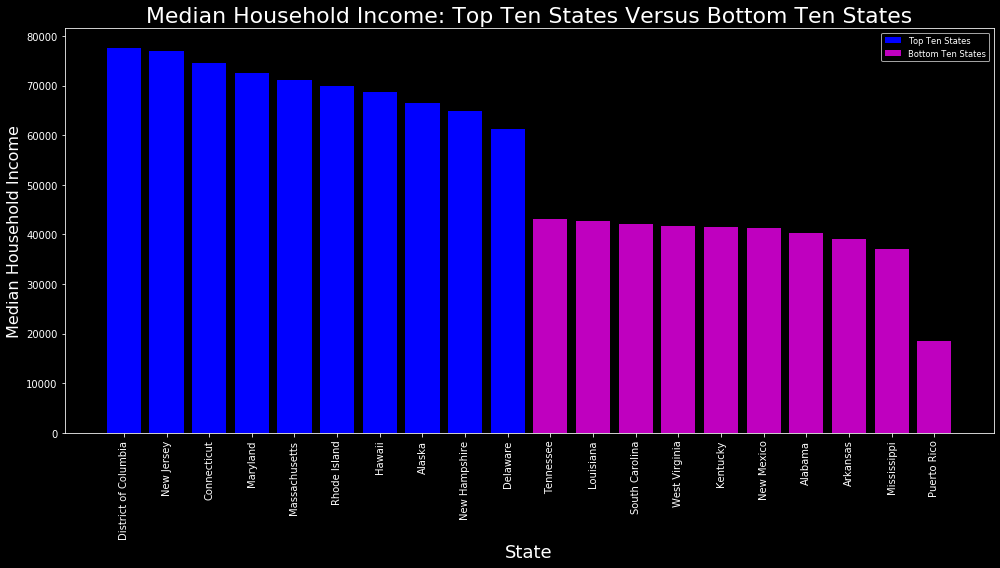

In [192]:
#bar chart for top and bottom 10 states by household income
plt.subplots(1, 1, figsize=(14,8))
t1 = top_bottom[top_bottom['Household Income']>50000]
t2 = top_bottom[top_bottom['Household Income']<50000]

#change colors of bars
plt.bar(t1.index.values,t1['Household Income'], color='b')
plt.bar(t2.index.values,t2['Household Income'], color='m')

#labels
plt.title("Median Household Income: Top Ten States Versus Bottom Ten States", fontsize=22)
plt.xlabel("State", fontsize=18)
plt.ylabel("Median Household Income", fontsize=16)
plt.xticks(rotation='vertical')
#plt.plot()
plt.tight_layout()
plt.legend(["Top Ten States", "Bottom Ten States"], 
           loc="upper right", ncol=1, fontsize='small')
plt.style.use('dark_background')
#plt.savefig('income_barchart_final_dark.pdf')


In [193]:
#df for the education of the top 10 states previously found
edu_top = income_sort_top[0:10]
edu_top = edu_top[['State Name', 'No College Degree Percentage',
                        'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']]
edu_top = edu_top.set_index('State Name')
edu_top.head(10)

,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
State Name,,,
District of Columbia,41.67%,39.72%,18.62%
New Jersey,54.69%,39.91%,5.40%
Connecticut,54.26%,39.44%,6.30%
Maryland,54.43%,37.95%,7.62%
Massachusetts,50.22%,42.23%,7.55%
Rhode Island,56.72%,37.99%,5.28%
Hawaii,55.69%,39.65%,4.67%
Alaska,61.72%,34.59%,3.70%
New Hampshire,53.62%,42.03%,4.36%


In [194]:
#take the percent off in order to chart
edu_top['No College Degree Percentage'] = (edu_top['No College Degree Percentage'].str.strip('%').astype(float))
edu_top['Associates or Bachelors Degree Percentage'] = (edu_top['Associates or Bachelors Degree Percentage'].str.strip('%').astype(float))
edu_top['Post Graduate Degree Percentage'] = (edu_top['Post Graduate Degree Percentage'].str.strip('%').astype(float))
edu_top.head()

,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
State Name,,,
District of Columbia,41.67,39.72,18.62
New Jersey,54.69,39.91,5.40
Connecticut,54.26,39.44,6.30
Maryland,54.43,37.95,7.62
Massachusetts,50.22,42.23,7.55


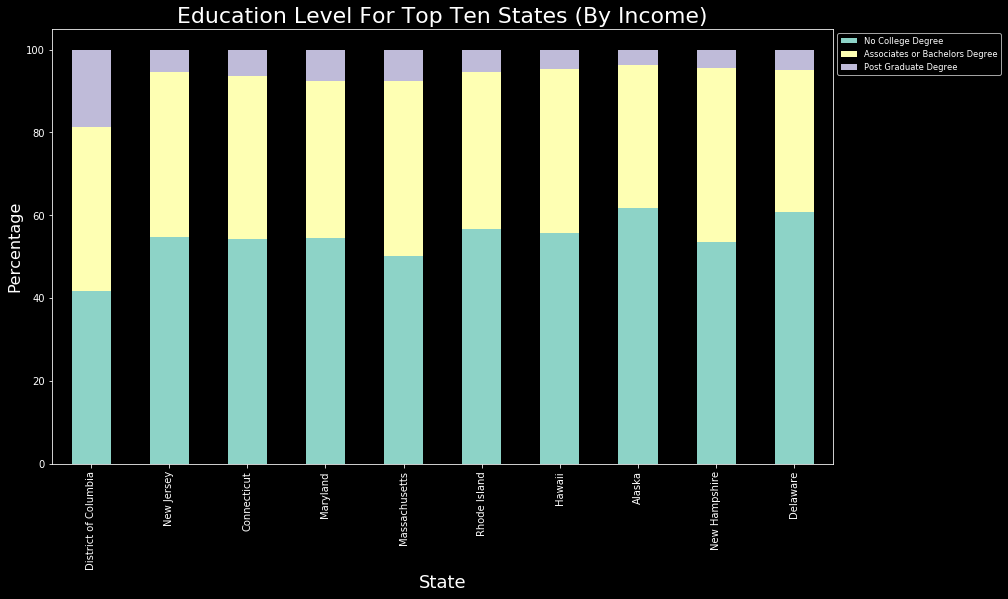

In [173]:
#bar chart for the education of top 10 states
f2 = edu_top.groupby(['No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage'])
edu_top[['No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']].plot(kind='bar', stacked=True,figsize=(14,8))

#labels
plt.title("Education Level For Top Ten States (By Income)", fontsize=22)
plt.xlabel("State", fontsize=18)
plt.ylabel("Percentage", fontsize=16)

#relabel and move the legend
plt.legend(["No College Degree", "Associates or Bachelors Degree", "Post Graduate Degree"], 
           loc="upper left", bbox_to_anchor=(1,1), ncol=1, fontsize='small')
plt.style.use('dark_background')
#plt.savefig('education_top_barchart_dark.pdf')

In [195]:
#df for the education of the bottom 10 states previously found
edu_bottom = income_sort_top[42:52]
edu_bottom = edu_bottom[['State Name', 'No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']]
edu_bottom = edu_bottom.set_index('State Name')
edu_bottom.head(10)

,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
State Name,,,
Tennessee,64.73%,31.47%,3.80%
Louisiana,68.22%,28.28%,3.50%
South Carolina,60.97%,35.58%,3.45%
West Virginia,71.92%,25.26%,2.82%
Kentucky,66.64%,29.67%,3.69%
New Mexico,62.85%,32.38%,4.78%
Alabama,64.71%,31.84%,3.45%
Arkansas,68.94%,27.97%,3.09%
Mississippi,66.27%,30.58%,3.16%


In [196]:
#take the percent off in order to chart
edu_bottom['No College Degree Percentage'] = (edu_bottom['No College Degree Percentage'].str.strip('%').astype(float))
edu_bottom['Associates or Bachelors Degree Percentage'] = (edu_bottom['Associates or Bachelors Degree Percentage'].str.strip('%').astype(float))
edu_bottom['Post Graduate Degree Percentage'] = (edu_bottom['Post Graduate Degree Percentage'].str.strip('%').astype(float))
edu_bottom.head()

,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
State Name,,,
Tennessee,64.73,31.47,3.80
Louisiana,68.22,28.28,3.50
South Carolina,60.97,35.58,3.45
West Virginia,71.92,25.26,2.82
Kentucky,66.64,29.67,3.69


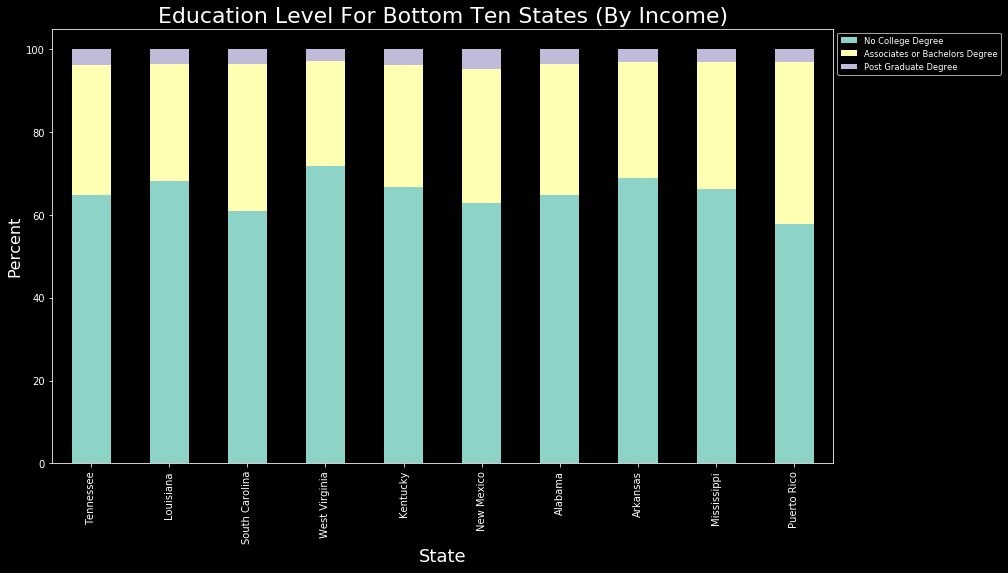

In [174]:
#bar chart for the education of top 10 states
f2 = edu_bottom.groupby(['No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage'])
edu_bottom[['No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']].plot(kind='bar', stacked=True,figsize=(14,8))

#labels
plt.title("Education Level For Bottom Ten States (By Income)", fontsize=22)
plt.xlabel("State", fontsize=18)
plt.ylabel("Percent", fontsize=16)

#relabel  and move legend
plt.legend(["No College Degree", "Associates or Bachelors Degree", "Post Graduate Degree"], 
           loc="upper left", bbox_to_anchor=(1,1), ncol=1, fontsize='small')
plt.style.use('dark_background')
#plt.savefig('education_bottom_barchart_dark.pdf')

In [216]:
#merge df for a stacked box plot of top 10 and bottom 10 together
done_df = pd.concat([top_ten_bar, bottom_ten_bar],ignore_index=False)
done_df = top_bottom[['State Name', 'No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']]

done_df.head(21)


,State Name,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
8,District of Columbia,41.67%,39.72%,18.62%
30,New Jersey,54.69%,39.91%,5.40%
6,Connecticut,54.26%,39.44%,6.30%
20,Maryland,54.43%,37.95%,7.62%
21,Massachusetts,50.22%,42.23%,7.55%
40,Rhode Island,56.72%,37.99%,5.28%
11,Hawaii,55.69%,39.65%,4.67%
1,Alaska,61.72%,34.59%,3.70%
29,New Hampshire,53.62%,42.03%,4.36%
7,Delaware,60.72%,34.44%,4.83%


In [217]:
#strip percent to prepare for bar chart
done_df['No College Degree Percentage'] = (done_df['No College Degree Percentage'].str.strip('%').astype(float))
done_df['Associates or Bachelors Degree Percentage'] = (done_df['Associates or Bachelors Degree Percentage'].str.strip('%').astype(float))
done_df['Post Graduate Degree Percentage'] = (done_df['Post Graduate Degree Percentage'].str.strip('%').astype(float))
done_df = done_df.set_index('State Name')
done_df.head(20)

C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\casey\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,No College Degree Percentage,Associates or Bachelors Degree Percentage,Post Graduate Degree Percentage
State Name,,,
District of Columbia,41.67,39.72,18.62
New Jersey,54.69,39.91,5.40
Connecticut,54.26,39.44,6.30
Maryland,54.43,37.95,7.62
Massachusetts,50.22,42.23,7.55
Rhode Island,56.72,37.99,5.28
Hawaii,55.69,39.65,4.67
Alaska,61.72,34.59,3.70
New Hampshire,53.62,42.03,4.36


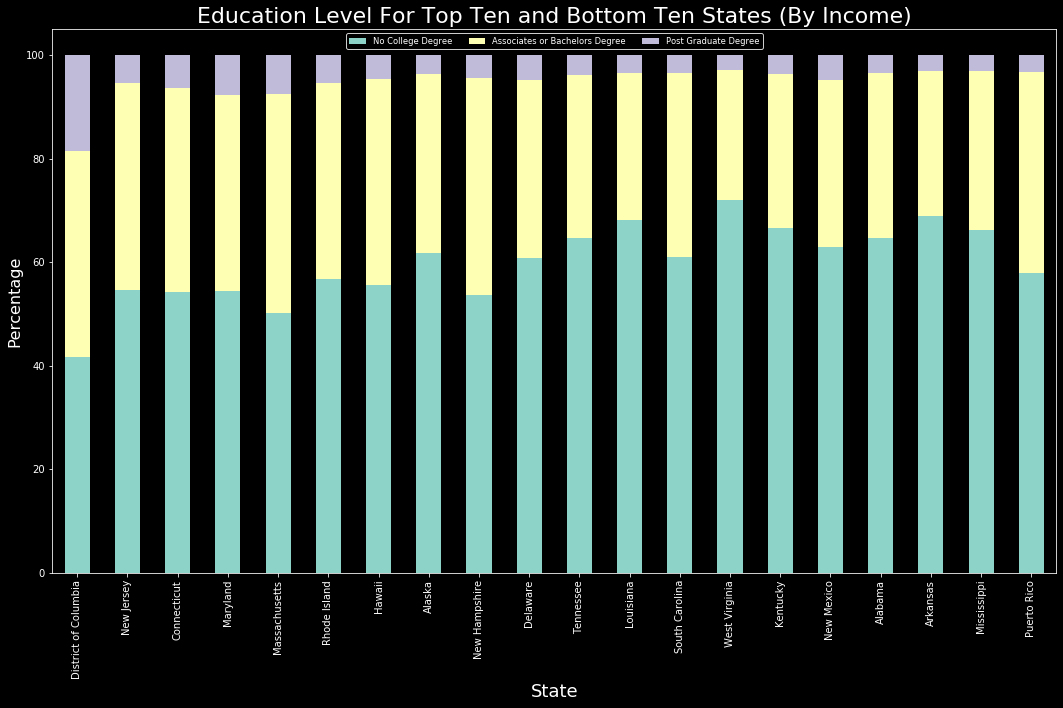

In [234]:
#bar chart for the education of top 10 states
f2 = done_df.groupby(['No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage'])
done_df[['No College Degree Percentage', 'Associates or Bachelors Degree Percentage', 'Post Graduate Degree Percentage']].plot(kind='bar', stacked=True,figsize=(18,10))

#labels
plt.title("Education Level For Top Ten and Bottom Ten States (By Income)", fontsize=22)
plt.xlabel("State", fontsize=18)
plt.ylabel("Percentage", fontsize=16)

#relabel and move the legend
plt.legend(["No College Degree", "Associates or Bachelors Degree", "Post Graduate Degree"], 
           loc='upper center', bbox_to_anchor=(0.5, 1.00), fancybox=True, shadow=True, ncol=6, fontsize='small')
#plt.legend(["No College Degree", "Associates or Bachelors Degree", "Post Graduate Degree"], 
           #loc="upper left", bbox_to_anchor=(1,1), ncol=1, fontsize='small')
plt.style.use('dark_background')
#plt.savefig('education_done.pdf')

